In [3]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("naml_exams"):
    os.chdir("..")

# Exercise 1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

Consider the Breast Cancer Wisconsin dataset. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features are used to classify the tumors into malignant (cancerous) or benign (non-cancerous).

In [2]:
data = load_breast_cancer()
X = data.data
X = np.transpose(X)
Y = data.target

In [25]:
X.shape

(30, 569)

Implement a function that, provided the dataset and the number of components to keep, exploits the covariance matrix and its eigenvalues to compute the principal components of the dataset. (Hint: use np.cov(X) to compute the covariance matrix).


In [4]:
def compute_pca(X, n_components):
    # Step 1: Center the data
    X_centered = X - np.mean(X, axis=1, keepdims=True)
    
    # Step 2: Compute the covariance matrix
    cov_matrix = np.cov(X_centered)
    
    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Step 4: Sort eigenvalues and eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_idx]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]
    
    # Step 5: Select the top n_components eigenvectors
    principal_components = sorted_eigenvectors[:, :n_components]
    
    # Step 6: Project the data onto the selected components
    X_pca = principal_components.T @ X_centered
    
    return X_pca, principal_components, sorted_eigenvalues[:n_components]

Compute the first two principal components of the dataset by using the function implemented at the previous point.

In [5]:
X_pca, components, eigenvals = compute_pca(X, n_components=2)

# Display results
print("Shape of projected data (2 principal components):", X_pca.shape)
print("Top 2 eigenvalues:", eigenvals)
print("Top 2 principal components (eigenvectors):")
print(components)

Shape of projected data (2 principal components): (2, 569)
Top 2 eigenvalues: [443782.6051466    7310.10006165]
Top 2 principal components (eigenvectors):
[[ 5.08623202e-03 -9.28705650e-03]
 [ 2.19657026e-03  2.88160658e-03]
 [ 3.50763298e-02 -6.27480827e-02]
 [ 5.16826469e-01 -8.51823720e-01]
 [ 4.23694535e-06  1.48194356e-05]
 [ 4.05260047e-05  2.68862249e-06]
 [ 8.19399539e-05 -7.51419574e-05]
 [ 4.77807775e-05 -4.63501038e-05]
 [ 7.07804332e-06  2.52430431e-05]
 [-2.62155251e-06  1.61197148e-05]
 [ 3.13742507e-04  5.38692831e-05]
 [-6.50984008e-05 -3.48370414e-04]
 [ 2.23634150e-03 -8.19640791e-04]
 [ 5.57271669e-02 -7.51112451e-03]
 [-8.05646029e-07 -1.49438131e-06]
 [ 5.51918197e-06 -1.27357957e-05]
 [ 8.87094462e-06 -2.86921009e-05]
 [ 3.27915009e-06 -9.36007477e-06]
 [-1.24101836e-06 -1.22647432e-05]
 [-8.54530832e-08 -2.89683790e-07]
 [ 7.15473257e-03  5.68673345e-04]
 [ 3.06736622e-03  1.32152605e-02]
 [ 4.94576447e-02  1.85961117e-04]
 [ 8.52063392e-01  5.19742358e-01]
 [ 6.

Compare and comment the results of the previous point, in terms of principal components, with the ones obtained by means of the exact SVD of rank r = 2.

In [6]:
X_centered = X - np.mean(X, axis=1, keepdims=True)

# 1. PCA via covariance matrix
X_pca_cov, components_cov, eigvals_cov = compute_pca(X, 2)

# 2. PCA via exact SVD
U, S, VT = np.linalg.svd(X_centered, full_matrices=False)
U_r = U[:, :2]  # First 2 left singular vectors
X_pca_svd = U_r.T @ X_centered

# Align components for comparison (accounting for sign ambiguity)
alignment = np.sign(np.sum(components_cov * U_r, axis=0))
components_cov_aligned = components_cov * alignment

# 3. Cosine similarity between the two sets of principal components
cos_sim = np.sum(components_cov_aligned * U_r, axis=0)

print("Cosine similarity between components (close to 1 means very similar):", cos_sim)

Cosine similarity between components (close to 1 means very similar): [1. 1.]


Plot the relations between the first 5 features in the original dataset.

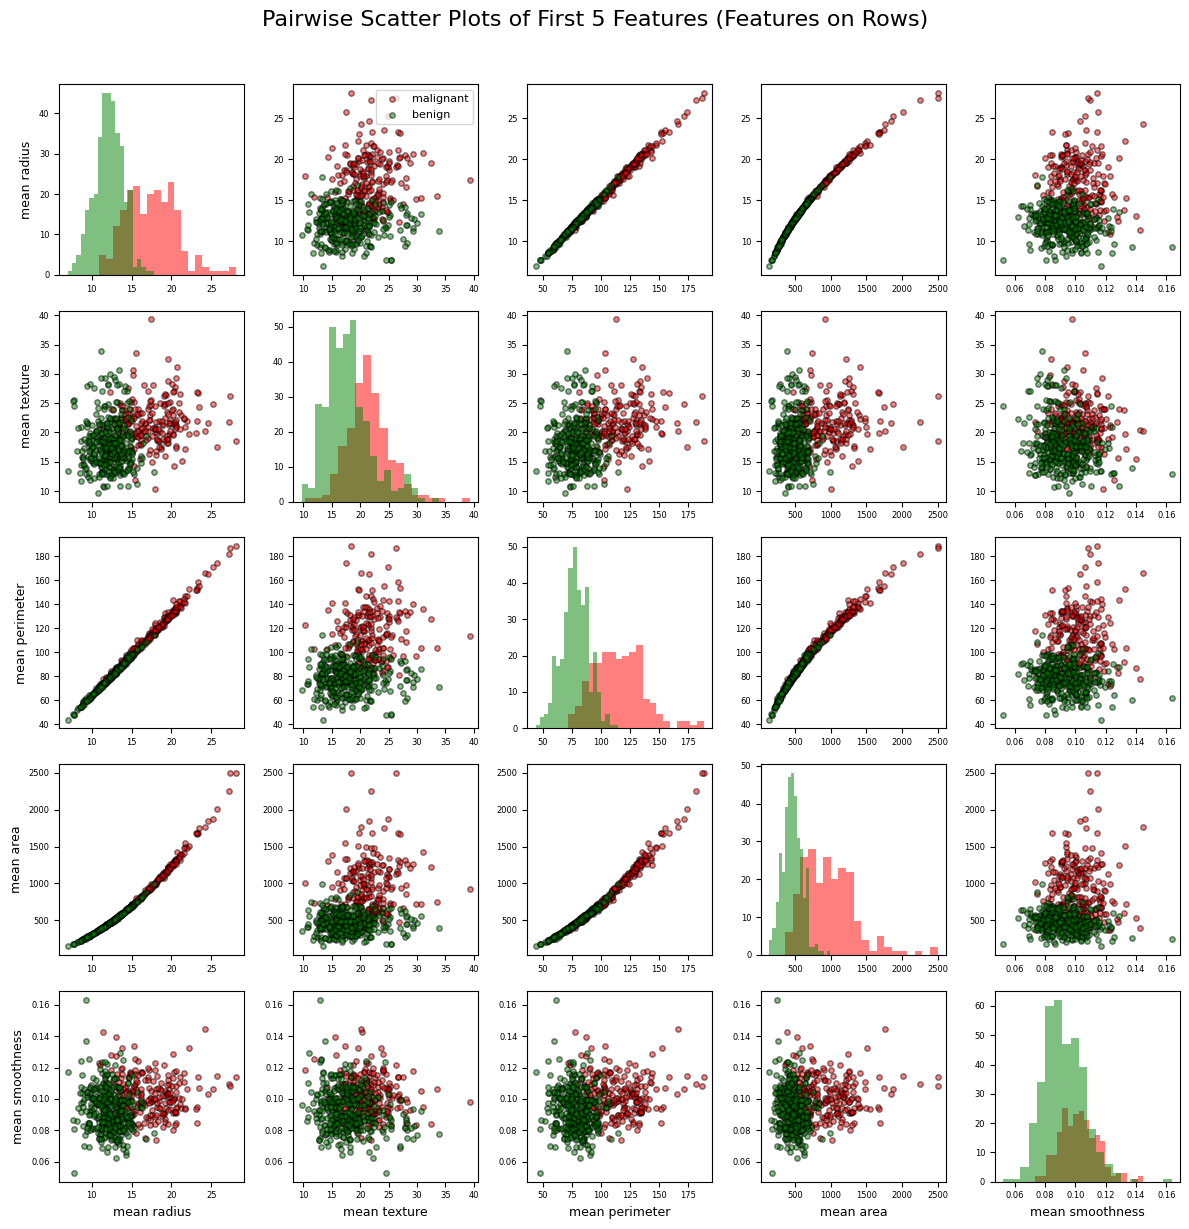

In [11]:
feature_names = data.feature_names[:5]

# Select only the first 5 features
X_subset = X[:5, :]           # Shape: (5, 569)

labels = ['malignant', 'benign']
colors = ['red', 'green']

fig, axes = plt.subplots(5, 5, figsize=(12, 12))
fig.suptitle("Pairwise Scatter Plots of First 5 Features (Features on Rows)", fontsize=16, y=1.02)

for i in range(5):
    for j in range(5):
        ax = axes[i, j]
        if i == j:
            # Diagonal: histograms of feature i
            ax.hist(X_subset[i, Y == 0], bins=20, alpha=0.5, color='red', label='malignant')
            ax.hist(X_subset[i, Y == 1], bins=20, alpha=0.5, color='green', label='benign')
            if j == 0:
                ax.set_ylabel(feature_names[i], fontsize=9)
            if i == 4:
                ax.set_xlabel(feature_names[j], fontsize=9)
        else:
            # Off-diagonal: scatter plot of feature j vs i
            for label, color in zip([0, 1], colors):
                ax.scatter(
                    X_subset[j, Y == label], X_subset[i, Y == label],
                    alpha=0.5, color=color, edgecolor='k', s=15,
                    label=labels[label] if (i == 0 and j == 1) else ""
                )
            if j == 0:
                ax.set_ylabel(feature_names[i], fontsize=9)
            if i == 4:
                ax.set_xlabel(feature_names[j], fontsize=9)
        ax.tick_params(labelsize=6)

# Add legend to one plot only
axes[0, 1].legend(fontsize=8, loc='upper right')

plt.tight_layout()
plt.show()

Make a scatterplot of the first two principal components of the patients. Compare the result with the ones of the previous point.

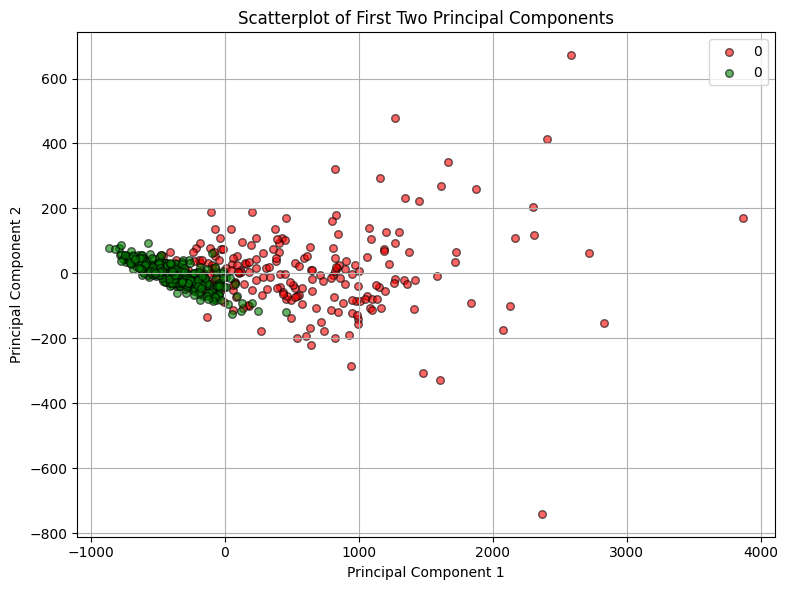

In [29]:
# Compute covariance matrix and eigen-decomposition
X_pca, eigvecs, eigvals = compute_pca(X, 2)

# Plot the projected data (each column = one patient)
plt.figure(figsize=(8, 6))
for label, color in zip([0, 1], ['red', 'green']):
    plt.scatter(
        X_pca[0, Y == label], X_pca[1, Y == label],
        alpha=0.6, label=Y[label], color=color, edgecolor='k', s=30
    )

plt.title("Scatterplot of First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Compute and plot the explained variance ratio, defined as the variance of a principle component divided by the total variance. (Hint: it can be computed by exploiting the eigenvalues of the principle components).

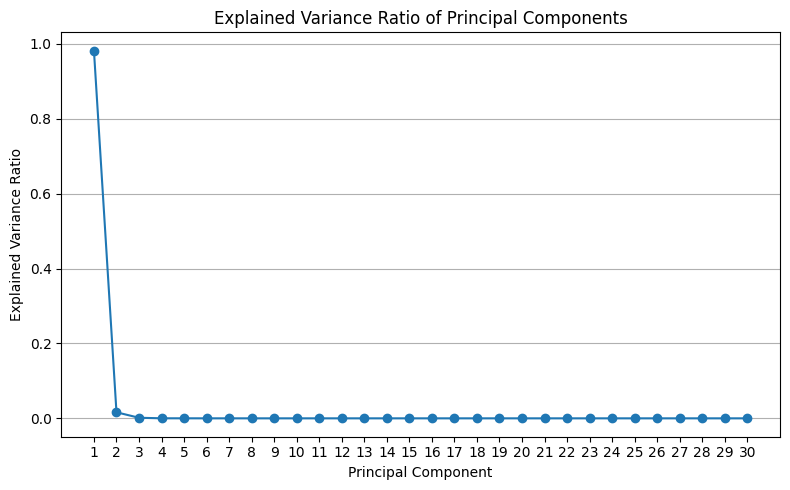

In [30]:
# Compute covariance matrix and eigen-decomposition
X_pca, eigvecs, eigvals = compute_pca(X, 30)

# Compute explained variance ratio
explained_variance_ratio = eigvals / np.sum(eigvals)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-')  # optional line connecting points
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

What is the percentage of the information lost by selecting 2 components ?

In [20]:
# Sum of variance explained by first 2 components
explained_2 = np.sum(explained_variance_ratio[:2])

# Percentage of variance lost (not explained)
variance_lost_percent = (1 - explained_2) * 100

print(f"Percentage of information lost by selecting 2 components: {variance_lost_percent:.2f}%")

Percentage of information lost by selecting 2 components: 0.18%


# Exercise 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt

Load the data contained in file Concrete_Data.csv as follows:

In [4]:
data = np.loadtxt("data/Concrete_Data.csv",delimiter=",")
A = data[:,:-1]
b = data[:,-1]
mean_A = np.mean(A,axis = 0)
A = A - mean_A
std_A = np.std(A, axis = 0)
A = A / std_A

In [5]:
A.shape

(1030, 8)

The dataset contains the characteristics of $n$ = 1030 samples of concrete; each sample $i$ is characterized by a feature vector $x_i$ (with 8 features) and by the corresponding target value $y_i$ which is the concrete compressive strength (in $MPa$).

Consider the Least Square method where the objective function is given by
$$
J(\mathbf{w})=\frac{1}{2n}||X\mathbf{w} -y||^2, \tag{1}
$$
where $X$ is a $n × 8$ matrix, $y$ is a n-dimensional vector and $\mathbf{w}$ is a vector with 8 components.

Proof that the vector $w^*$ that minimize $J(\mathbf{w})$ is given by $w∗ = (X^T X)^{-1}X^T y$

Step 1: Expand the Cost Function

Recall that for any vector $ a $, $ \|a\|^2 = a^T a $. So,

$$
J(w) = \frac{1}{2n} (Xw - y)^T (Xw - y)
$$

Step 2: Compute the Gradient

We want to minimize $ J(w) $, so we compute its gradient with respect to $ w $:

$$
\nabla_w J(w) = \frac{1}{2n} \nabla_w \left[ (Xw - y)^T (Xw - y) \right]
$$

Using the identity:

$$
\nabla_w \left[(Aw - b)^T (Aw - b)\right] = 2A^T (Aw - b)
$$

we get:

$$
\nabla_w J(w) = \frac{1}{2n} \cdot 2 X^T (Xw - y) = \frac{1}{n} X^T (Xw - y)
$$

Step 3: Set the Gradient to Zero

To minimize $ J(w) $, set the gradient to zero:

$$
\frac{1}{n} X^T (Xw - y) = 0
$$

Multiply both sides by $ n $:

$$
X^T (Xw - y) = 0
$$

$$
X^T X w = X^T y
$$

Step 4: Solve for $ w $

Assuming $ X^T X $ is invertible:

$$
w^* = (X^T X)^{-1} X^T y
$$

Show how the SVD of X can be used to simplify the computation of $w∗$. Compute $w∗$ (using the SVD) and the corresponding value $J(w∗)$.

Step 1: SVD of $ X $

Let the SVD of $ X \in \mathbb{R}^{n \times 8} $ be:

$$
X = U \Sigma V^T
$$

Where:
- $ U \in \mathbb{R}^{n \times n} $ is an orthogonal matrix ($ U^T U = I $),
- $ \Sigma \in \mathbb{R}^{n \times 8} $ is a diagonal (or block-diagonal) matrix of singular values $ \sigma_i \geq 0 $,
- $ V \in \mathbb{R}^{8 \times 8} $ is an orthogonal matrix ($ V^T V = I $).

Step 2: Least Squares Solution via SVD

Recall the normal equation solution:

$$
w^* = (X^T X)^{-1} X^T y
$$

Substitute $ X = U \Sigma V^T $:

$$
X^T X = V \Sigma^T \Sigma V^T
\quad \Rightarrow \quad
(X^T X)^{-1} = V (\Sigma^T \Sigma)^{-1} V^T
$$

Also,

$$
X^T y = V \Sigma^T U^T y
$$

So:

$$
w^* = V (\Sigma^T \Sigma)^{-1} \Sigma^T U^T y
$$

This simplifies using the **pseudoinverse** $ \Sigma^+ $, defined by taking reciprocals of nonzero singular values:

$$
w^* = V \Sigma^+ U^T y
$$

Step 3: Compute $ J(w^*) $

We use:

$$
J(w^*) = \frac{1}{2n} \|Xw^* - y\|^2
$$

Since $ w^* $ is the least-squares solution, we can write the residual:

$$
r = y - Xw^* = (I - X X^+) y
$$

So the cost becomes:

$$
J(w^*) = \frac{1}{2n} \| (I - X X^+) y \|^2
$$

This is the squared norm of the component of $ y $ orthogonal to the column space of $ X $.

In [23]:
# Compute SVD
U, S, VT = np.linalg.svd(A, full_matrices=False)

# Compute pseudoinverse of Sigma
S_inv = np.diag(1 / S)
A_pseudo_inv = VT.T @ S_inv @ U.T  # X⁺ = V Σ⁺ Uᵗ

# Compute least squares solution using SVD
w_star = A_pseudo_inv @ b

# Compute J(w*)
residual = A @ w_star - b
J_star = (1 / (2 * len(b))) * np.sum(residual ** 2)

# Output results
print("Least squares solution w* using SVD:\n", w_star)
print("\nCost function J(w*):", J)

Least squares solution w* using SVD:
 [12.51423615  8.95712234  5.62480067 -3.19983624  1.74485575  1.40559189
  1.61799518  7.21189448]

Cost function J(w*): 695.0617890478907


Implement the Stochastic Gradient Descent method for minimizing (1).

In [16]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, max_iters=10000, track_every=100):
    """
    SGD with cost tracking for plotting convergence.

    Parameters:
        X (np.ndarray): Feature matrix
        y (np.ndarray): Target vector
        learning_rate (float): Step size
        max_iters (int): Total number of updates
        track_every (int): Record cost every 'track_every' iterations

    Returns:
        w (np.ndarray): Final weights
        cost_history (list): Cost values at intervals
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    cost_history = []

    for it in range(max_iters):
        i = np.random.randint(n_samples)
        xi = X[i]
        yi = y[i]
        gradient = (xi @ w - yi) * xi
        w -= learning_rate * gradient

        if it % track_every == 0:
            residual = X @ w - y
            cost = (1 / (2 * n_samples)) * np.sum(residual ** 2)
            cost_history.append(cost)

    return w, cost_history

Run your function for computing $w^∗$. Perform 10000 iterations with different values of the learning rate $\eta$; use as initial guess a vector of all zeros.

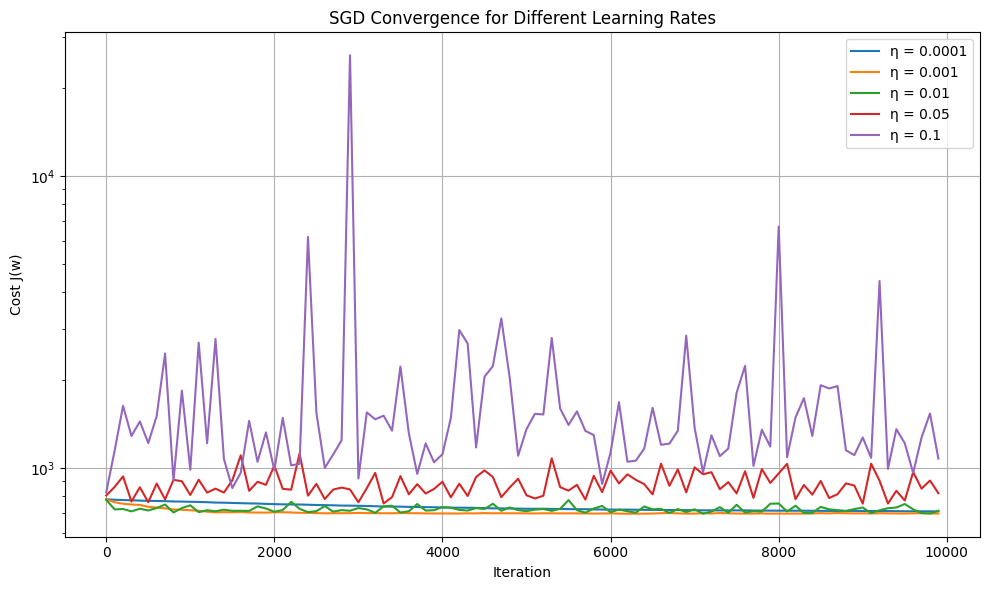

In [21]:
# Learning rates to compare
learning_rates = [1e-4, 1e-3, 1e-2, 0.05, 0.1]
max_iters = 10000
track_every = 100

# Plot convergence
plt.figure(figsize=(10, 6))
for eta in learning_rates:
    _, cost_history = stochastic_gradient_descent(A, b, learning_rate=eta, max_iters=max_iters, track_every=track_every)
    plt.semilogy(range(0, max_iters, track_every), cost_history, label=f"η = {eta}")

plt.xlabel("Iteration")
plt.ylabel("Cost J(w)")
plt.title("SGD Convergence for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Modify your implementation in order to have a decreasing learning rate given by
$$
\eta_k = \frac{\eta_0}{\sigma_{min}} \frac{1}{k+1} \tag{2}
$$
where $\eta_0 = 0.01$, $\sigma_{min}$ is the smallest singular value of A and k is the iteration index.

In [22]:
def stochastic_gradient_descent_decreasing_lr(X, y, eta0=0.01, max_iters=10000, track_every=100):
    """
    SGD with decreasing learning rate η_k = η0 / σ_min * 1 / (k+1)

    Parameters:
        X (np.ndarray): Feature matrix
        y (np.ndarray): Target vector
        eta0 (float): Initial base learning rate η0
        max_iters (int): Number of iterations
        track_every (int): Interval for tracking cost

    Returns:
        w (np.ndarray): Final weights
        cost_history (list): Cost values tracked during training
    """
    n_samples, n_features = X.shape
    w = np.zeros(n_features)
    cost_history = []

    # Compute smallest non-zero singular value
    _, S, _ = np.linalg.svd(X, full_matrices=False)
    sigma_min = np.min(S[S > 1e-12])  # Avoid numerical zero

    for k in range(max_iters):
        i = np.random.randint(n_samples)
        xi = X[i]
        yi = y[i]

        # Decreasing learning rate
        eta_k = eta0 / sigma_min / (k + 1)

        # Gradient update
        gradient = (xi @ w - yi) * xi
        w -= eta_k * gradient

        if k % track_every == 0:
            residual = X @ w - y
            cost = (1 / (2 * n_samples)) * np.sum(residual ** 2)
            cost_history.append(cost)

    return w, cost_history

Plot, on the same graphic, the value of the quantity $J(w_k) − J(w^∗)$ as a function of k for the case with
fixed learning rate and for the case with a decreasing learning rate. What do you observe ?


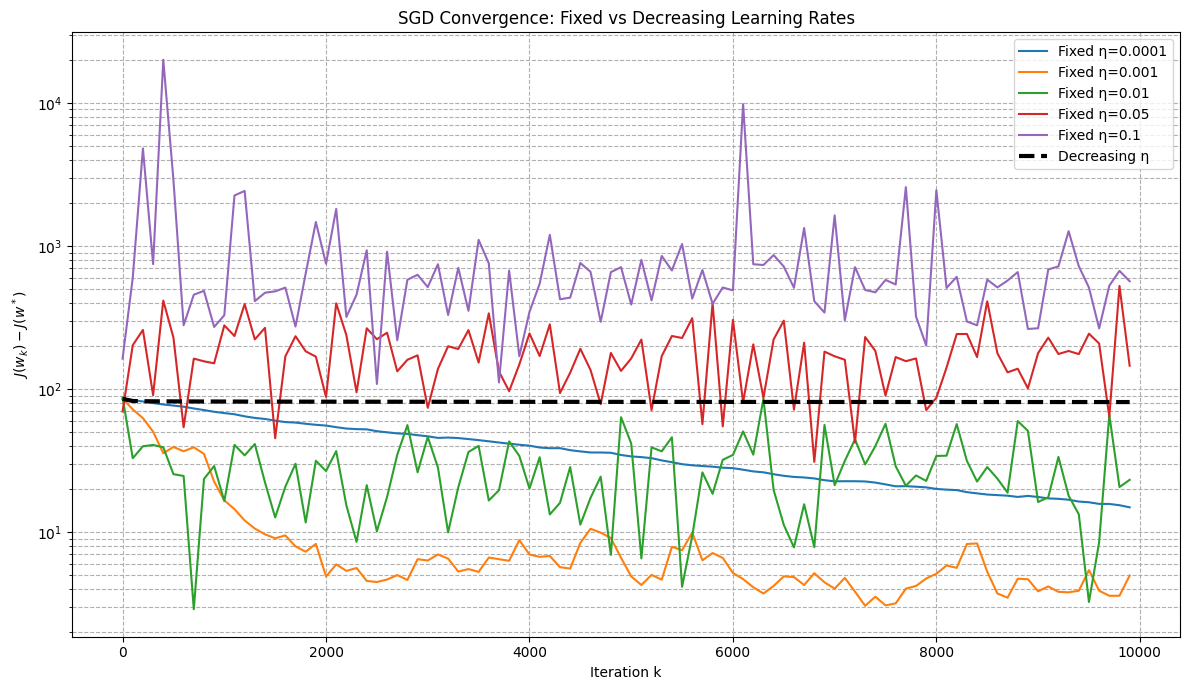

In [26]:
learning_rates = [1e-4, 1e-3, 1e-2, 0.05, 0.1]

plt.figure(figsize=(12, 7))

# Run SGD with fixed learning rates and plot
for eta in learning_rates:
    _, cost_hist = stochastic_gradient_descent(A, b, learning_rate=eta, max_iters=max_iters, track_every=track_every)
    diff = np.array(cost_hist) - J_star
    plt.plot(np.arange(0, max_iters, track_every), diff, label=f'Fixed η={eta}')

# Run SGD with decreasing learning rate and plot
_, cost_decreasing = stochastic_gradient_descent_decreasing_lr(A, b, eta0=0.01, max_iters=max_iters, track_every=track_every)
diff_decreasing = np.array(cost_decreasing) - J_star
plt.plot(np.arange(0, max_iters, track_every), diff_decreasing, label='Decreasing η', linewidth=3, linestyle='--', color='black')

plt.yscale('log')
plt.xlabel('Iteration k')
plt.ylabel(r'$J(w_k) - J(w^*)$')
plt.title('SGD Convergence: Fixed vs Decreasing Learning Rates')
plt.legend()
plt.grid(True, which='both', linestyle='--')
plt.tight_layout()
plt.show()

From the plot, we observe that using a decreasing learning rate results in a much smoother learning curve. However, lower fixed learning rates often outperform the decreasing learning rate in terms of final convergence speed and accuracy. This suggests that the learning rate decay may be too aggressive, causing the step sizes to shrink too quickly and slowing down the learning process prematurely, preventing the algorithm from reaching an optimal value efficiently.

On the other hand, a fixed learning rate requires careful tuning: if set too high, it can cause divergence or unstable updates, but when chosen appropriately, it can lead to faster and more stable convergence.